In [1]:
from sklearn.decomposition import PCA
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GMM

In [2]:
# lista unificada con las estaciones que cumplen al menos un criterio
# 0= numero de criterios cumplidos, 1= codigo, 2,3=lonlat, 4=altura
listam=np.loadtxt('listam.txt')

In [3]:
# Contamos cuantas variables fueron medidas por estacion, se almacena en tomados (cuyo indice coincide con el indice de listam)
df=pd.read_csv('lluvia.csv')
tomados=np.zeros(len(listam[:,1]))
for i in range(len(listam[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam[i,1]==df.CODIGO[k]):
            tomados[i]+=1
df=pd.read_csv('humedad.csv')
for i in range(len(listam[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam[i,1]==df.CODIGO[k]):
            tomados[i]+=1
df=pd.read_csv('diaslluvia.csv')
for i in range(len(listam[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam[i,1]==df.CODIGO[k]):
            tomados[i]+=1  
df=pd.read_csv('brillo.csv')
for i in range(len(listam[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam[i,1]==df.CODIGO[k]):
            tomados[i]+=1 

In [4]:
probfilter=np.logical_not(((listam[:,0]==1)*((tomados-listam[:,0]==0)|(tomados-listam[:,0]==1)))|((listam[:,0]==2)*(tomados-listam[:,0]==0)))
listacorta=listam[probfilter]
incog=(tomados-listam[:,0])[probfilter]

(-5, 14)

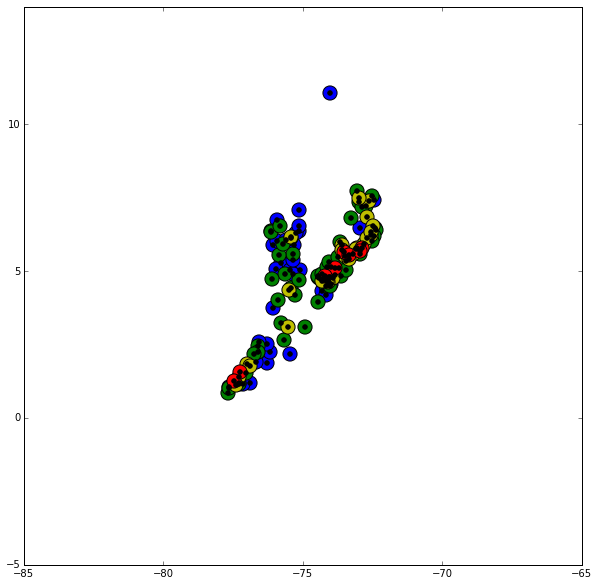

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(-listacorta[:,2][incog==3.],-listacorta[:,3][incog==3.],c='b',s=200)
plt.scatter(-listacorta[:,2][incog==2.],-listacorta[:,3][incog==2.],c='g',s=200)
plt.scatter(-listacorta[:,2][incog==1.],-listacorta[:,3][incog==1.],c='y',s=200)
plt.scatter(-listacorta[:,2][incog==0.],-listacorta[:,3][incog==0.],c='r',s=200)
plt.scatter(-listacorta[:,2],-listacorta[:,3],c='k')
plt.xlim(-85,-65)
plt.ylim(-5,14)

In [6]:
def genprob2(paux3,paux4):
    p3=1./4
    p4=1./16
    p33=p3*paux3
    p34=p4*paux4
    return p33+p34  

In [7]:
def parseprob2(i,j):
    if((i==4.)&(j==0.)):
        return genprob2(0.,1.)
    if((i==3.)&(j==0.)):
        return genprob2(1.,0.)
    if((i==3.)&(j==1.)):
        return genprob2(4./5,1./5)
    if((i==2.)&(j==1.)):
        return genprob2(4./10,0.)
    if((i==2.)&(j==2.)):
        return genprob2(4./11,1./11)
    if((i==1.)&(j==2.)):
        return genprob2(4./14,0.)
    if((i==1.)&(j==3.)):
        return genprob2(4./15,1./15)

In [8]:
probarr=np.zeros(len(incog))
for i in range(len(incog)):
    probarr[i]=parseprob2(listacorta[i,0],incog[i])

(-5, 14)

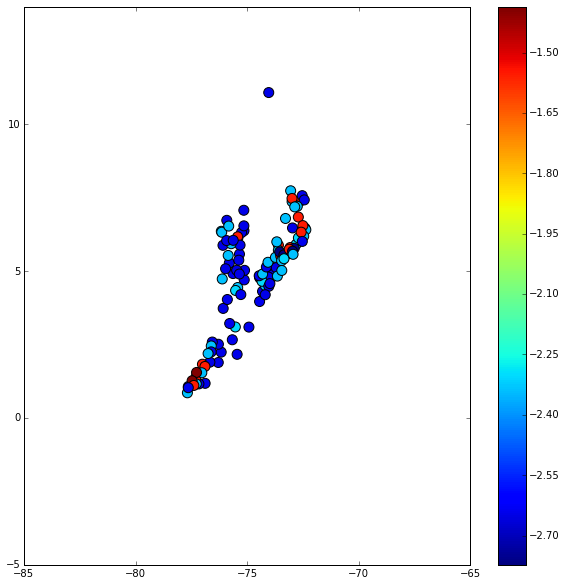

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(-listacorta[:,2],-listacorta[:,3],c=np.log(probarr),s=100)
plt.colorbar()
plt.xlim(-85,-65)
plt.ylim(-5,14)

In [10]:
def parseprob3(i,j):
    if((i==4.)&(j==0.)):
        return genprob2(0.,1.)
    if((i==3.)&(j==1.)):
        return genprob2(0.,1./5)
    if((i==2.)&(j==2.)):
        return genprob2(0.,1./11)
    if((i==1.)&(j==3.)):
        return genprob2(0,1./15)

In [11]:
pfilter2=(listam[:,0]==4.)|((listam[:,0]==3.)&(tomados-listam[:,0]==1.))|((listam[:,0]==2.)&(tomados-listam[:,0]==2.))|((listam[:,0]==1.)&(tomados-listam[:,0]==3.))
listacorta2=listam[pfilter2]
incog2=(tomados-listam[:,0])[pfilter2]

In [15]:
(listam[:,0]==4).sum()

5

In [12]:
probarr3=np.zeros(len(incog2))
for i in range(len(incog2)):
    probarr3[i]=parseprob3(listacorta2[i,0],incog2[i])

(-5, 14)

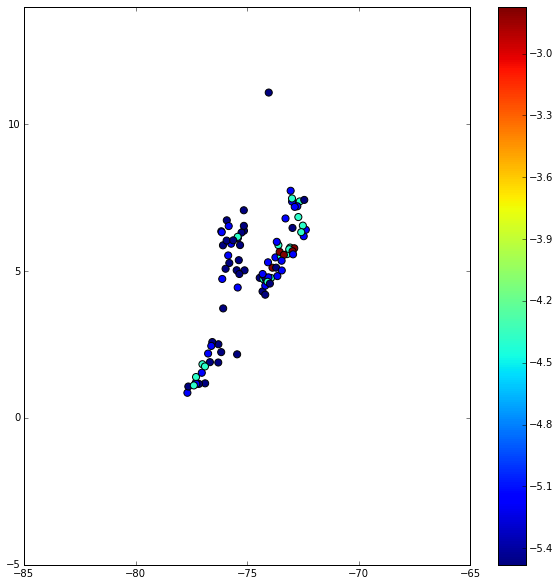

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(-listacorta2[:,2],-listacorta2[:,3],c=np.log(probarr3),s=50)
plt.colorbar()
plt.xlim(-85,-65)
plt.ylim(-5,14)

In [79]:
for kcomp in range(1,4):
    gmm = GMM(kcomp, covariance_type='full', random_state=0)
    gmm.fit(listacorta2[:,2:5])
    cluster_label_geo = gmm.predict(listacorta2[:,2:5])
    print kcomp, gmm.bic(listacorta2[:,2:5])

1 2082.66293774
2 2045.67938223
3 1995.0637356


In [29]:
cluster_label_geo

array([2, 2, 2, 4, 3, 3, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 3, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 3, 0, 0, 0, 0, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [93]:
uchu=(11,15,33,165)
wdata=0
for i in range(1,5):
    wdata=wdata+(listacorta2[:,0]==i).sum()*uchu[i-1]
wdata

2332

In [163]:
listaexp=np.zeros((wdata,5))
kcount=0
for i in range(len(probarr3)):
    for inde in range(4):
        if listacorta2[i,0]==inde+1:
            for kinx in range(uchu[inde]):
                listaexp[kinx+kcount,:]=listacorta2[i,:]
            kcount=kcount+kinx
    kcount=kcount+1
    

In [247]:
cv_types = ['spherical', 'tied', 'diag', 'full']
#cv_types = ['full'] + 59
bicold=0
for cv_type in cv_types:
    for kcomp in np.arange(10)+1:        
        gmm = GMM(kcomp, covariance_type=cv_type, random_state=0)
        gmm.fit(listaexp[:,2:5])
        if bicold<gmm.bic(listaexp[:,2:5]):
            print cv_type,kcomp,gmm.bic(listaexp[:,2:5])
        bicold=gmm.bic(listaexp[:,2:5])
        

spherical 1 96407.7243526
tied 4 45046.9618587
tied 8 44186.8584845
tied 10 43824.3678405
diag 1 51888.9322887
diag 9 40498.4057262
full 1 49307.2352584


In [248]:
kcomp=9
gmm = GMM(kcomp, covariance_type='diag', random_state=0)
gmm.fit(listaexp[:,2:5])
cluster_label_stacked = gmm.predict(listaexp[:,2:5])
print kcomp, gmm.bic(listaexp[:,2:5])

9 40498.4057262


In [249]:
listastacked=np.vstack((listaexp.T,cluster_label_stacked)).T

In [250]:
np.savetxt('lisstck.txt',listastacked)

In [252]:
%%bash
uniq -c lisstck.txt > listcomp.txt


In [253]:
listcomp=np.loadtxt('listcomp.txt')

(-5, 14)

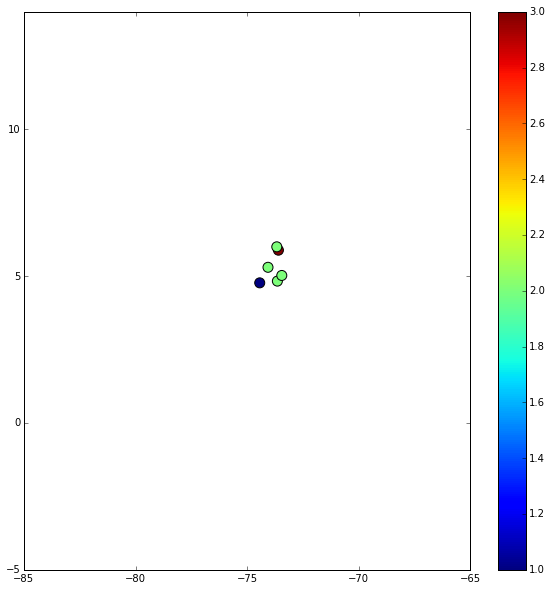

In [280]:
plt.figure(figsize=(10,10))
filter=(listcomp[:,6]==8)
plt.scatter(-listcomp[:,3][filter],-listcomp[:,4][filter],c=listcomp[:,1][filter],s=100)
plt.colorbar()
plt.xlim(-85,-65)
plt.ylim(-5,14)

<matplotlib.colorbar.Colorbar instance at 0x7f77e4ecc200>

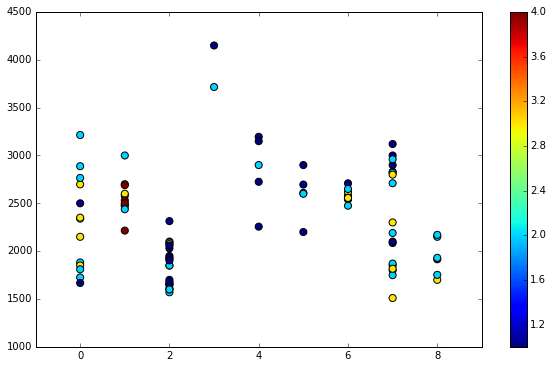

In [255]:
plt.figure(figsize=(10,6))

plt.scatter(listcomp[:,6],listcomp[:,5],c=listcomp[:,1],s=50)
plt.colorbar()


(-5, 14)

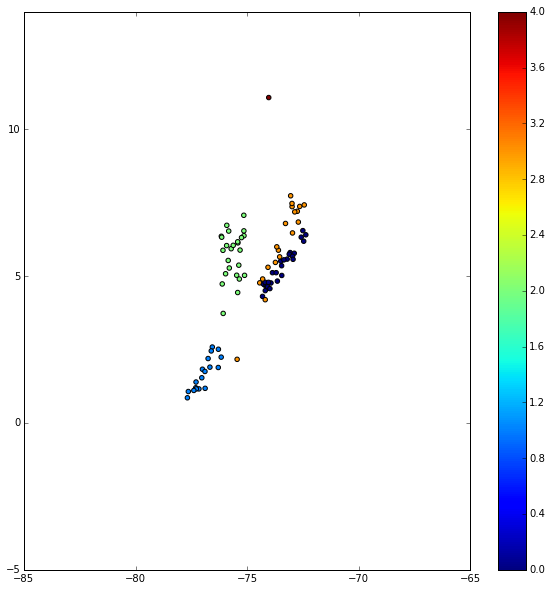

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(-listacorta2[:,2],-listacorta2[:,3],c=cluster_label_geo)
plt.colorbar()
plt.xlim(-85,-65)
plt.ylim(-5,14)

(-5, 14)

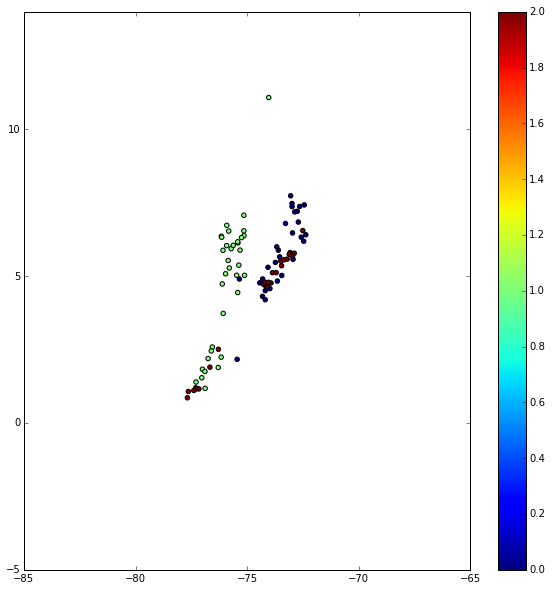

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(-listacorta2[:,2],-listacorta2[:,3],c=cluster_label_geo)
plt.colorbar()
plt.xlim(-85,-65)
plt.ylim(-5,14)

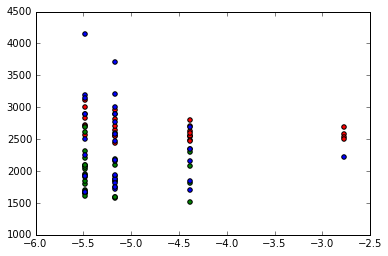

In [49]:
plt.scatter(np.log(probarr3[cluster_label_geo==2]),listacorta2[:,4][cluster_label_geo==2],c='r')
plt.scatter(np.log(probarr3[cluster_label_geo==1]),listacorta2[:,4][cluster_label_geo==1],c='g')
plt.scatter(np.log(probarr3[cluster_label_geo==0]),listacorta2[:,4][cluster_label_geo==0],c='b')


(-5, 14)

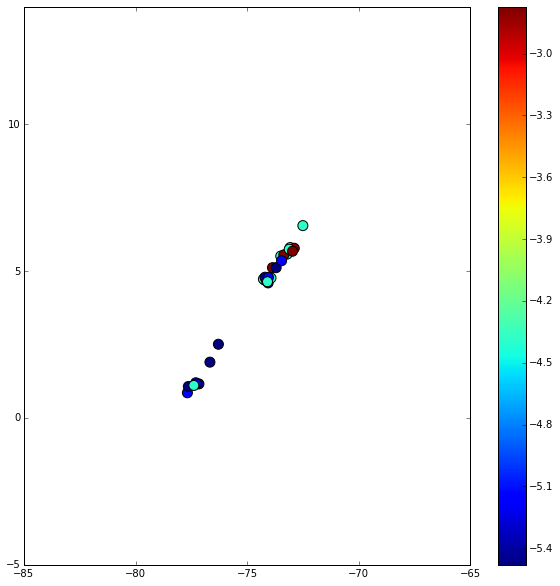

In [80]:
# Grupo 
plt.figure(figsize=(10,10))
plt.scatter(-listacorta2[:,2][cluster_label_geo==2],-listacorta2[:,3][cluster_label_geo==2],c=np.log(probarr3[cluster_label_geo==2]),s=100)
plt.colorbar()
plt.xlim(-85,-65)
plt.ylim(-5,14)

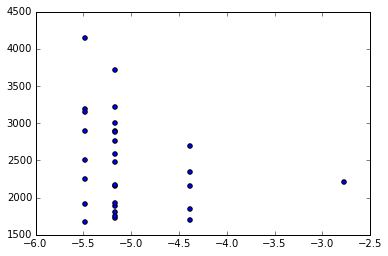

In [54]:
plt.scatter(np.log(probarr3[cluster_label_geo==0]),listacorta2[:,4][cluster_label_geo==0],c='b')

In [55]:
listacorta3=listacorta2[cluster_label_geo==0]
probarr4=probarr3[cluster_label_geo==0]

In [59]:
for kcomp in range(1,4):
    gmm = GMM(kcomp, covariance_type='full', random_state=0)
    gmm.fit(listacorta3[:,2:5])
    cluster_label_geo2 = gmm.predict(listacorta3[:,2:5])
    print kcomp, gmm.bic(listacorta3[:,2:5])

1 616.014713896
2 630.102812492
3 616.989885733


(-5, 14)

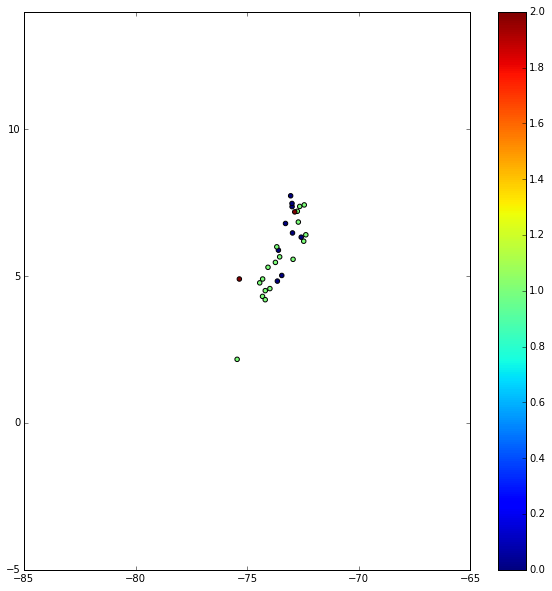

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(-listacorta3[:,2],-listacorta3[:,3],c=cluster_label_geo2)
plt.colorbar()
plt.xlim(-85,-65)
plt.ylim(-5,14)

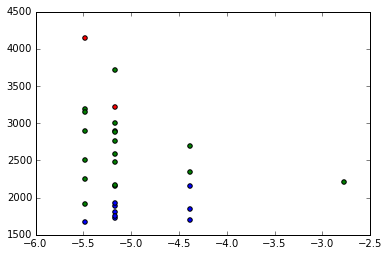

In [61]:
plt.scatter(np.log(probarr4[cluster_label_geo2==2]),listacorta3[:,4][cluster_label_geo2==2],c='r')
plt.scatter(np.log(probarr4[cluster_label_geo2==1]),listacorta3[:,4][cluster_label_geo2==1],c='g')
plt.scatter(np.log(probarr4[cluster_label_geo2==0]),listacorta3[:,4][cluster_label_geo2==0],c='b')

(-5, 14)

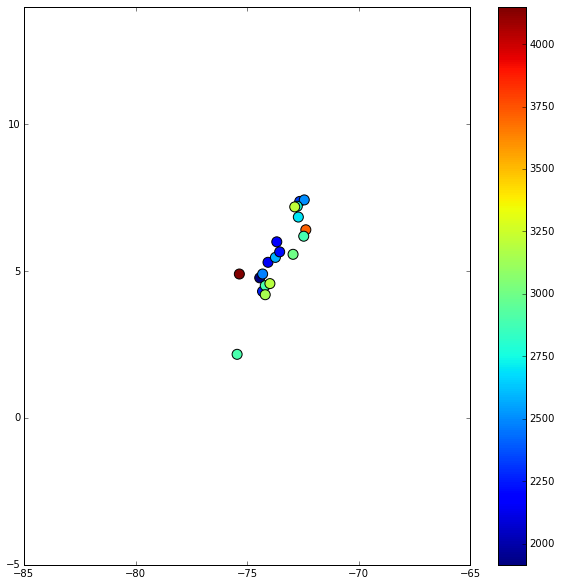

In [73]:
plt.figure(figsize=(10,10))
myfilter=(cluster_label_geo2==1)|(cluster_label_geo2==2)
plt.scatter(-listacorta3[myfilter][:,2],-listacorta3[myfilter][:,3],c=listacorta3[myfilter][:,4],s=100)
plt.colorbar()
plt.xlim(-85,-65)
plt.ylim(-5,14)

(5, 8)

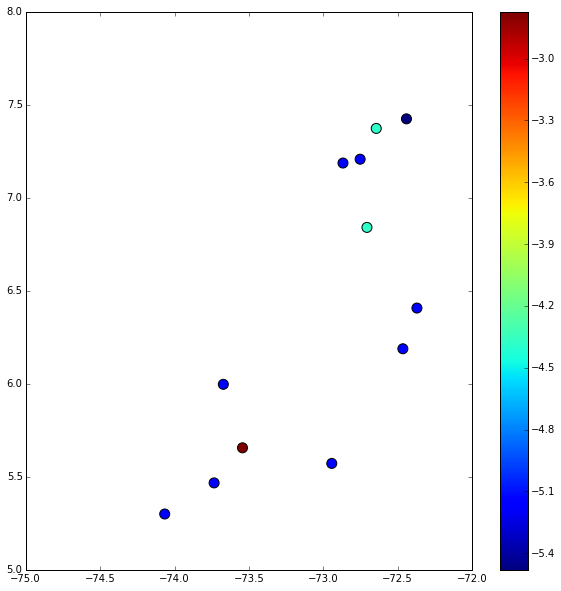

In [75]:
plt.figure(figsize=(10,10))
plt.scatter(-listacorta3[myfilter][:,2],-listacorta3[myfilter][:,3],c=np.log(probarr4[myfilter]),s=100)
plt.colorbar()
plt.xlim(-75,-72)
plt.ylim(5,8)